# F1 Telemetry Analysis
***
### Verstappen vs Piastri - 2024 Bahrain GP Qualifying

In [154]:
# Setup: imports and cache
import fastf1
import fastf1.plotting as f1plt
import matplotlib.pyplot as plt
import pandas as pd
import os
import logging

# Suppress INFO logs, for clarity
logging.getLogger('fastf1').setLevel(logging.WARNING)

# Create cache folder
os.makedirs("cache", exist_ok=True)
fastf1.Cache.enable_cache('cache')

# Set plotting style
f1plt.setup_mpl()

print("✅")


✅


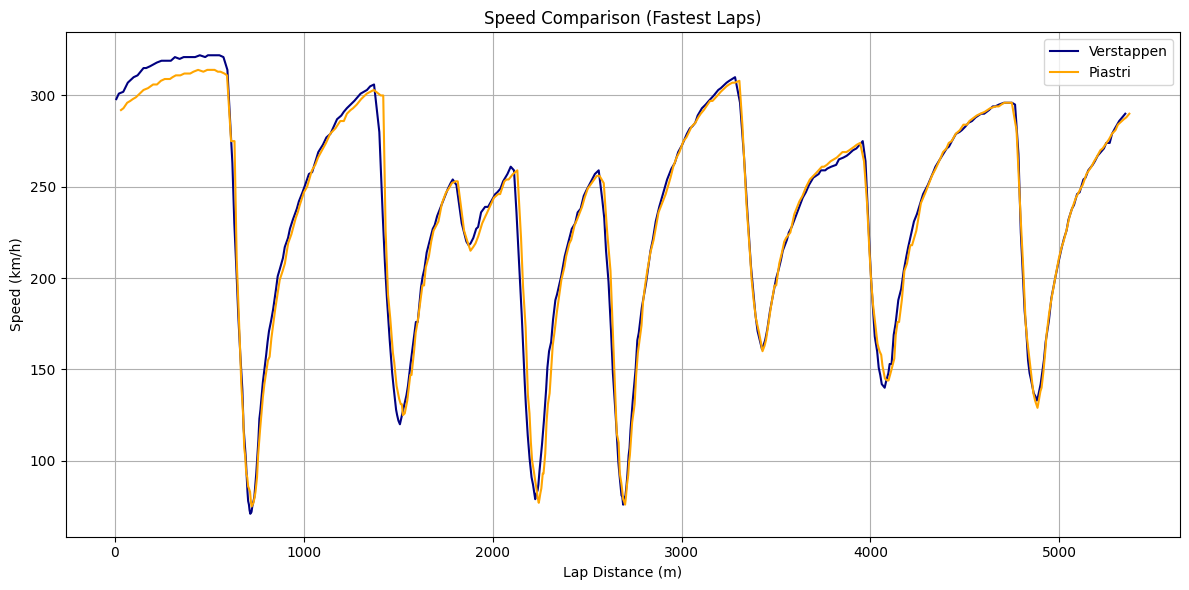

In [155]:
# Load session data (2024 Bahrain GP Qualifying)
session_data = fastf1.get_session(2024, 'Bahrain', 'Q')
session_data.load()

# Get fastest laps
verstappen = session_data.laps.pick_drivers(['VER']).pick_fastest()
piastri = session_data.laps.pick_drivers(['PIA']).pick_fastest()

# Extract telemetry
verstappen_tel = verstappen.get_car_data().add_distance()
piastri_tel = piastri.get_car_data().add_distance()

# Plot Speed Comparison
plt.figure(figsize=(12,6))
plt.plot(verstappen_tel['Distance'], verstappen_tel['Speed'], label='Verstappen', color='navy')
plt.plot(piastri_tel['Distance'], piastri_tel['Speed'], label='Piastri', color='orange')
plt.title("Speed Comparison (Fastest Laps)")
plt.xlabel("Lap Distance (m)")
plt.ylabel("Speed (km/h)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("speed_comparison.png", dpi=300)
plt.show()

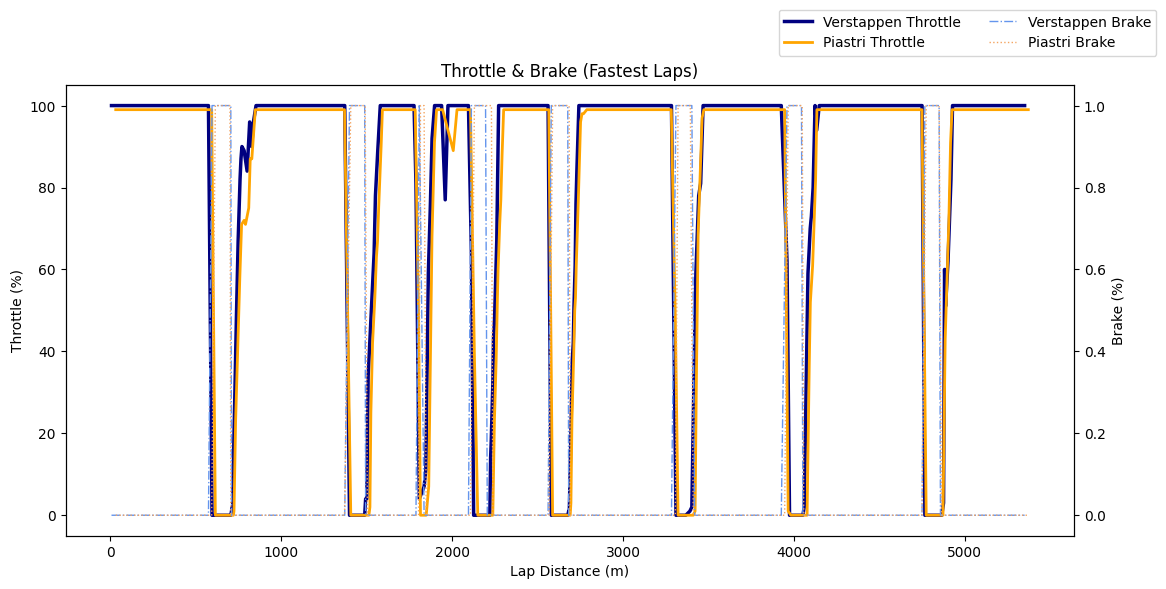

In [156]:
# Plot Throttle & Brake Graph
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(verstappen_tel['Distance'], verstappen_tel['Throttle'], label="Verstappen Throttle", color='navy', linewidth=2.5)
ax1.plot(piastri_tel['Distance'], piastri_tel['Throttle'], label="Piastri Throttle", color='orange', linewidth=2.0)
ax1.set_xlabel("Lap Distance (m)")
ax1.set_ylabel("Throttle (%)")

ax2 = ax1.twinx()
ax2.plot(verstappen_tel['Distance'], verstappen_tel['Brake'], label="Verstappen Brake", color='cornflowerblue', linestyle='-.', linewidth=1.0)
ax2.plot(piastri_tel['Distance'], piastri_tel['Brake'], label="Piastri Brake", color='sandybrown', linestyle=':', linewidth=1.0)
ax2.set_ylabel("Brake (%)")

# Create and format legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best', bbox_to_anchor=(0.7, 1.05), ncol=2)

plt.title("Throttle & Brake (Fastest Laps)")
plt.tight_layout()

plt.savefig("throttle_brake.png", dpi=300)
plt.show()
